In [3]:
pip install keras numpy matplotlib

In [29]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201, ResNet152, VGG16, InceptionV3, MobileNet, EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt


In [9]:
train_path = '/content/drive/MyDrive/Retinopathy/Dataset/train'
valid_path = '/content/drive/MyDrive/Retinopathy/Dataset/valid'
test_path = '/content/drive/MyDrive/Retinopathy/Dataset/test'


In [11]:
datagen = ImageDataGenerator(
    rescale=1./255,             # Rescale pixel values to the range [0, 1]
    samplewise_center=True,    # Center pixel values around zero
    samplewise_std_normalization=True,  # Normalize pixel values to have unit variance
    rotation_range=20,          # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,      # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,     # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,            # Apply shear transformation with a range of 20 degrees
    zoom_range=0.2,             # Randomly zoom into images by up to 20%
    horizontal_flip=True,       # Randomly flip images horizontally
    vertical_flip=True          # Randomly flip images vertically
)

In [12]:
train_batches = datagen.flow_from_directory(train_path, target_size=(224,224), classes=['dr','nodr'], batch_size=10)
valid_batches = datagen.flow_from_directory(valid_path, target_size=(224,224), classes=['dr','nodr'], batch_size=10)
test_batches = datagen.flow_from_directory(test_path, target_size=(224,224), classes=['dr','nodr'], batch_size=10)

Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [13]:
densenet_base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception_base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet_base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
efficientnet_base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
for layer in densenet_base_model.layers:
    layer.trainable = False
for layer in resnet_base_model.layers:
    layer.trainable = False
for layer in vgg16_base_model.layers:
    layer.trainable = False
for layer in inception_base_model.layers:
    layer.trainable = False
for layer in mobilenet_base_model.layers:
    layer.trainable = False
for layer in efficientnet_base_model.layers:
    layer.trainable = False

In [16]:
densenet_model = Sequential()
densenet_model.add(densenet_base_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(2, activation='softmax'))
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
resnet_model = Sequential()
resnet_model.add(resnet_base_model)
resnet_model.add(GlobalAveragePooling2D())
resnet_model.add(Dense(2, activation='softmax'))
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
vgg16_model = Sequential()
vgg16_model.add(vgg16_base_model)
vgg16_model.add(GlobalAveragePooling2D())
vgg16_model.add(Dense(2, activation='softmax'))
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
inception_model = Sequential()
inception_model.add(inception_base_model)
inception_model.add(GlobalAveragePooling2D())
inception_model.add(Dense(2, activation='softmax'))
inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
mobilenet_model = Sequential()
mobilenet_model.add(mobilenet_base_model)
mobilenet_model.add(GlobalAveragePooling2D())
mobilenet_model.add(Dense(2, activation='softmax'))
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
efficientnet_model = Sequential()
efficientnet_model.add(efficientnet_base_model)
efficientnet_model.add(GlobalAveragePooling2D())
efficientnet_model.add(Dense(2, activation='softmax'))
efficientnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
densenet_history = densenet_model.fit(train_batches, steps_per_epoch=len(train_batches),
                                                validation_data=valid_batches, validation_steps=len(valid_batches),
                                                epochs=10, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
4/4 - 103s - 26s/step - accuracy: 0.4750 - loss: 0.7574 - val_accuracy: 0.5750 - val_loss: 0.7857
Epoch 2/10
4/4 - 10s - 2s/step - accuracy: 0.5000 - loss: 0.7346 - val_accuracy: 0.5750 - val_loss: 0.7276
Epoch 3/10
4/4 - 6s - 1s/step - accuracy: 0.6250 - loss: 0.6592 - val_accuracy: 0.5000 - val_loss: 0.7447
Epoch 4/10
4/4 - 7s - 2s/step - accuracy: 0.6750 - loss: 0.6049 - val_accuracy: 0.5500 - val_loss: 0.6760
Epoch 5/10
4/4 - 6s - 1s/step - accuracy: 0.6750 - loss: 0.6378 - val_accuracy: 0.5750 - val_loss: 0.7544
Epoch 6/10
4/4 - 11s - 3s/step - accuracy: 0.7500 - loss: 0.5305 - val_accuracy: 0.6000 - val_loss: 0.6765
Epoch 7/10
4/4 - 10s - 3s/step - accuracy: 0.6750 - loss: 0.5359 - val_accuracy: 0.4750 - val_loss: 0.7478
Epoch 8/10
4/4 - 6s - 1s/step - accuracy: 0.8000 - loss: 0.5149 - val_accuracy: 0.5750 - val_loss: 0.7048
Epoch 9/10
4/4 - 10s - 3s/step - accuracy: 0.7500 - loss: 0.5002 - val_accuracy: 0.4500 - val_loss: 0.6739
Epoch 10/10
4/4 - 11s - 3s/step - accur

In [24]:
resnet_history = resnet_model.fit(train_batches, steps_per_epoch=len(train_batches),
                                            validation_data=valid_batches, validation_steps=len(valid_batches),
                                            epochs=10, verbose=2)

Epoch 1/10
4/4 - 44s - 11s/step - accuracy: 0.4000 - loss: 0.7790 - val_accuracy: 0.5000 - val_loss: 0.7343
Epoch 2/10
4/4 - 7s - 2s/step - accuracy: 0.5500 - loss: 0.6731 - val_accuracy: 0.5000 - val_loss: 0.7402
Epoch 3/10
4/4 - 6s - 1s/step - accuracy: 0.6250 - loss: 0.6924 - val_accuracy: 0.4000 - val_loss: 0.7162
Epoch 4/10
4/4 - 10s - 3s/step - accuracy: 0.6250 - loss: 0.6733 - val_accuracy: 0.4500 - val_loss: 0.7189
Epoch 5/10
4/4 - 8s - 2s/step - accuracy: 0.5750 - loss: 0.6695 - val_accuracy: 0.3750 - val_loss: 0.7425
Epoch 6/10
4/4 - 8s - 2s/step - accuracy: 0.4250 - loss: 0.7348 - val_accuracy: 0.4000 - val_loss: 0.7538
Epoch 7/10
4/4 - 10s - 3s/step - accuracy: 0.6000 - loss: 0.6831 - val_accuracy: 0.5250 - val_loss: 0.6625
Epoch 8/10
4/4 - 10s - 2s/step - accuracy: 0.6500 - loss: 0.6533 - val_accuracy: 0.4750 - val_loss: 0.7632
Epoch 9/10
4/4 - 11s - 3s/step - accuracy: 0.4750 - loss: 0.6999 - val_accuracy: 0.3500 - val_loss: 0.7937
Epoch 10/10
4/4 - 12s - 3s/step - accura

In [25]:
vgg16_history = vgg16_model.fit(train_batches, steps_per_epoch=len(train_batches),
                                          validation_data=valid_batches, validation_steps=len(valid_batches),
                                          epochs=10, verbose=2)

Epoch 1/10
4/4 - 14s - 3s/step - accuracy: 0.3500 - loss: 0.7425 - val_accuracy: 0.3750 - val_loss: 0.7244
Epoch 2/10
4/4 - 14s - 3s/step - accuracy: 0.4000 - loss: 0.7087 - val_accuracy: 0.4750 - val_loss: 0.7034
Epoch 3/10
4/4 - 6s - 1s/step - accuracy: 0.4750 - loss: 0.7038 - val_accuracy: 0.4750 - val_loss: 0.7080
Epoch 4/10
4/4 - 11s - 3s/step - accuracy: 0.4500 - loss: 0.6943 - val_accuracy: 0.3250 - val_loss: 0.7163
Epoch 5/10
4/4 - 7s - 2s/step - accuracy: 0.5500 - loss: 0.6819 - val_accuracy: 0.3750 - val_loss: 0.7094
Epoch 6/10
4/4 - 10s - 3s/step - accuracy: 0.6000 - loss: 0.6846 - val_accuracy: 0.4250 - val_loss: 0.7037
Epoch 7/10
4/4 - 6s - 1s/step - accuracy: 0.5000 - loss: 0.6963 - val_accuracy: 0.3750 - val_loss: 0.7120
Epoch 8/10
4/4 - 11s - 3s/step - accuracy: 0.6500 - loss: 0.6766 - val_accuracy: 0.3500 - val_loss: 0.7267
Epoch 9/10
4/4 - 10s - 3s/step - accuracy: 0.5750 - loss: 0.6738 - val_accuracy: 0.4250 - val_loss: 0.7207
Epoch 10/10
4/4 - 9s - 2s/step - accurac

In [26]:
inception_history = inception_model.fit(train_batches, steps_per_epoch=len(train_batches),
                                                validation_data=valid_batches, validation_steps=len(valid_batches),
                                                epochs=10, verbose=2)

Epoch 1/10
4/4 - 32s - 8s/step - accuracy: 0.5750 - loss: 0.7970 - val_accuracy: 0.3750 - val_loss: 0.9226
Epoch 2/10
4/4 - 23s - 6s/step - accuracy: 0.6500 - loss: 0.6588 - val_accuracy: 0.4750 - val_loss: 0.9569
Epoch 3/10
4/4 - 5s - 1s/step - accuracy: 0.6750 - loss: 0.6749 - val_accuracy: 0.5250 - val_loss: 0.9930
Epoch 4/10
4/4 - 8s - 2s/step - accuracy: 0.6000 - loss: 0.7009 - val_accuracy: 0.4250 - val_loss: 1.0208
Epoch 5/10
4/4 - 5s - 1s/step - accuracy: 0.7000 - loss: 0.6006 - val_accuracy: 0.4500 - val_loss: 0.9535
Epoch 6/10
4/4 - 6s - 2s/step - accuracy: 0.6750 - loss: 0.6258 - val_accuracy: 0.5000 - val_loss: 0.8591
Epoch 7/10
4/4 - 9s - 2s/step - accuracy: 0.7500 - loss: 0.5092 - val_accuracy: 0.5000 - val_loss: 0.9132
Epoch 8/10
4/4 - 10s - 3s/step - accuracy: 0.7500 - loss: 0.5084 - val_accuracy: 0.5000 - val_loss: 0.8159
Epoch 9/10
4/4 - 6s - 2s/step - accuracy: 0.6750 - loss: 0.5596 - val_accuracy: 0.4750 - val_loss: 0.8887
Epoch 10/10
4/4 - 9s - 2s/step - accuracy: 

In [27]:
mobilenet_history = mobilenet_model.fit(train_batches, steps_per_epoch=len(train_batches),
                                                validation_data=valid_batches, validation_steps=len(valid_batches),
                                                epochs=10, verbose=2)

Epoch 1/10
4/4 - 15s - 4s/step - accuracy: 0.6000 - loss: 0.6724 - val_accuracy: 0.5000 - val_loss: 0.7735
Epoch 2/10
4/4 - 5s - 1s/step - accuracy: 0.5750 - loss: 0.6926 - val_accuracy: 0.5250 - val_loss: 0.7346
Epoch 3/10
4/4 - 5s - 1s/step - accuracy: 0.6750 - loss: 0.6157 - val_accuracy: 0.5000 - val_loss: 0.9201
Epoch 4/10
4/4 - 10s - 3s/step - accuracy: 0.6500 - loss: 0.6175 - val_accuracy: 0.3750 - val_loss: 0.8332
Epoch 5/10
4/4 - 10s - 3s/step - accuracy: 0.7750 - loss: 0.5934 - val_accuracy: 0.6500 - val_loss: 0.7438
Epoch 6/10
4/4 - 10s - 3s/step - accuracy: 0.8000 - loss: 0.4672 - val_accuracy: 0.5000 - val_loss: 0.8027
Epoch 7/10
4/4 - 11s - 3s/step - accuracy: 0.6500 - loss: 0.6077 - val_accuracy: 0.5250 - val_loss: 0.8321
Epoch 8/10
4/4 - 5s - 1s/step - accuracy: 0.8500 - loss: 0.4784 - val_accuracy: 0.5500 - val_loss: 0.7530
Epoch 9/10
4/4 - 6s - 2s/step - accuracy: 0.6750 - loss: 0.5353 - val_accuracy: 0.5500 - val_loss: 0.7862
Epoch 10/10
4/4 - 12s - 3s/step - accurac

In [28]:
efficientnet_history = efficientnet_model.fit(train_batches, steps_per_epoch=len(train_batches),
                                                validation_data=valid_batches, validation_steps=len(valid_batches),
                                                epochs=10, verbose=2)

Epoch 1/10
4/4 - 33s - 8s/step - accuracy: 0.5000 - loss: 0.7388 - val_accuracy: 0.4500 - val_loss: 0.7035
Epoch 2/10
4/4 - 6s - 2s/step - accuracy: 0.4750 - loss: 0.6971 - val_accuracy: 0.5000 - val_loss: 0.6962
Epoch 3/10
4/4 - 5s - 1s/step - accuracy: 0.5000 - loss: 0.7031 - val_accuracy: 0.4750 - val_loss: 0.7071
Epoch 4/10
4/4 - 11s - 3s/step - accuracy: 0.4000 - loss: 0.7128 - val_accuracy: 0.5000 - val_loss: 0.6978
Epoch 5/10
4/4 - 8s - 2s/step - accuracy: 0.5250 - loss: 0.7006 - val_accuracy: 0.5000 - val_loss: 0.6979
Epoch 6/10
4/4 - 5s - 1s/step - accuracy: 0.4500 - loss: 0.7003 - val_accuracy: 0.4750 - val_loss: 0.6986
Epoch 7/10
4/4 - 6s - 2s/step - accuracy: 0.5250 - loss: 0.7029 - val_accuracy: 0.4250 - val_loss: 0.7110
Epoch 8/10
4/4 - 6s - 1s/step - accuracy: 0.5000 - loss: 0.6914 - val_accuracy: 0.4250 - val_loss: 0.7126
Epoch 9/10
4/4 - 11s - 3s/step - accuracy: 0.5000 - loss: 0.6959 - val_accuracy: 0.4750 - val_loss: 0.7023
Epoch 10/10
4/4 - 6s - 1s/step - accuracy: 

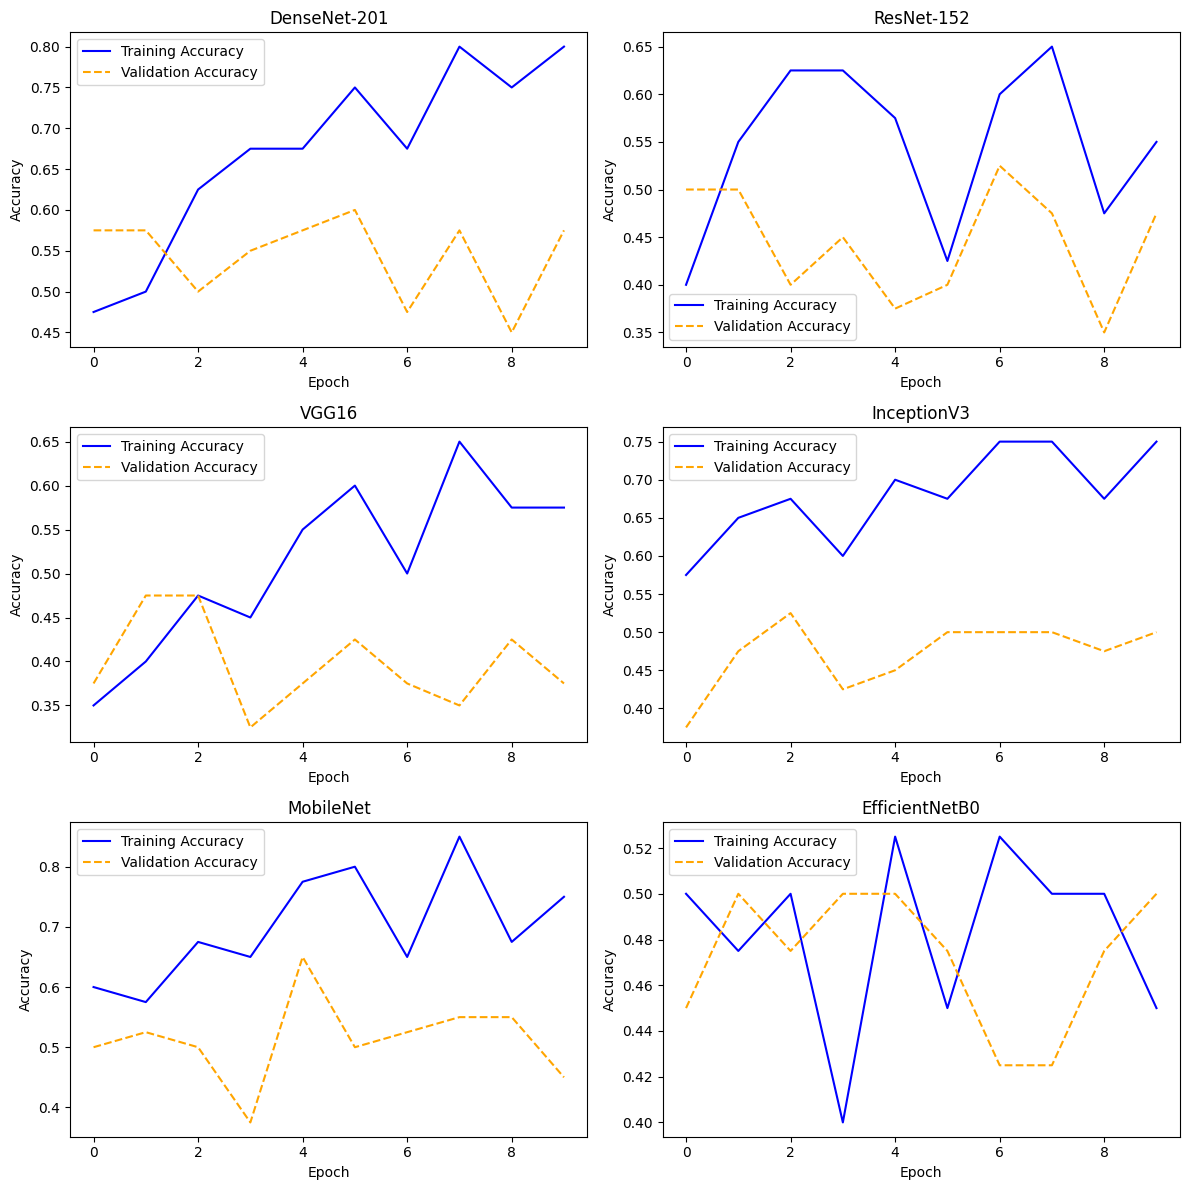

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

models = ['DenseNet-201', 'ResNet-152', 'VGG16', 'InceptionV3', 'MobileNet', 'EfficientNetB0']
histories = [densenet_history, resnet_history, vgg16_history, inception_history, mobilenet_history, efficientnet_history]

axes = axes.ravel()  # Flatten 3x2 axes grid into a 1D array of 6 subplots

for idx, ax in enumerate(axes):
    history = histories[idx]
    model_name = models[idx]

    ax.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--')

    ax.set_title(model_name)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

plt.tight_layout()
plt.show()


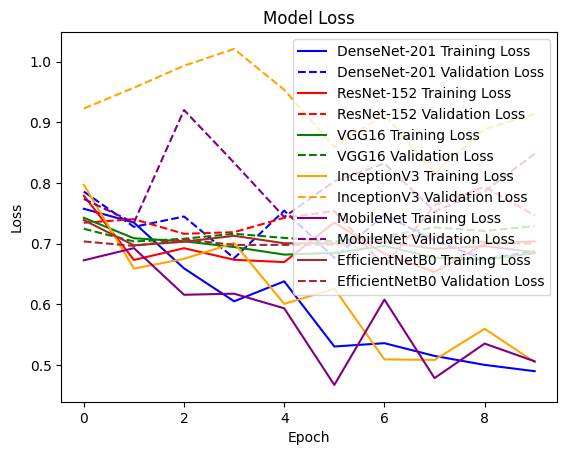

In [31]:
#Plot DenseNet-201 loss
plt.plot(densenet_history.history['loss'], label='DenseNet-201 Training Loss', color='blue', linestyle='-')
plt.plot(densenet_history.history['val_loss'], label='DenseNet-201 Validation Loss', color='blue', linestyle='--')

# Plot ResNet-152 loss
plt.plot(resnet_history.history['loss'], label='ResNet-152 Training Loss', color='red', linestyle='-')
plt.plot(resnet_history.history['val_loss'], label='ResNet-152 Validation Loss', color='red', linestyle='--')

# Plot VGG16 loss
plt.plot(vgg16_history.history['loss'], label='VGG16 Training Loss', color='green', linestyle='-')
plt.plot(vgg16_history.history['val_loss'], label='VGG16 Validation Loss', color='green', linestyle='--')

# Plot InceptionV3 loss
plt.plot(inception_history.history['loss'], label='InceptionV3 Training Loss', color='orange', linestyle='-')
plt.plot(inception_history.history['val_loss'], label='InceptionV3 Validation Loss', color='orange', linestyle='--')

# Plot MobileNet loss
plt.plot(mobilenet_history.history['loss'], label='MobileNet Training Loss', color='purple', linestyle='-')
plt.plot(mobilenet_history.history['val_loss'], label='MobileNet Validation Loss', color='purple', linestyle='--')

# Plot EfficientNet loss
plt.plot(efficientnet_history.history['loss'], label='EfficientNetB0 Training Loss', color='brown', linestyle='-')
plt.plot(efficientnet_history.history['val_loss'], label='EfficientNetB0 Validation Loss', color='brown', linestyle='--')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
densenet_test_score = densenet_model.evaluate(test_batches, steps=len(test_batches))
resnet_test_score = resnet_model.evaluate(test_batches, steps=len(test_batches))
vgg16_test_score = vgg16_model.evaluate(test_batches, steps=len(test_batches))
inception_test_score = inception_model.evaluate(test_batches, steps=len(test_batches))
mobilenet_test_score = mobilenet_model.evaluate(test_batches, steps=len(test_batches))
efficientnet_test_score = efficientnet_model.evaluate(test_batches, steps=len(test_batches))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.6733 - loss: 0.6053
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 630ms/step - accuracy: 0.3900 - loss: 0.7215
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 649ms/step - accuracy: 0.4233 - loss: 0.6805
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 870ms/step - accuracy: 0.7300 - loss: 0.6087
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 618ms/step - accuracy: 0.5267 - loss: 0.6342
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 899ms/step - accuracy: 0.4267 - loss: 0.7173


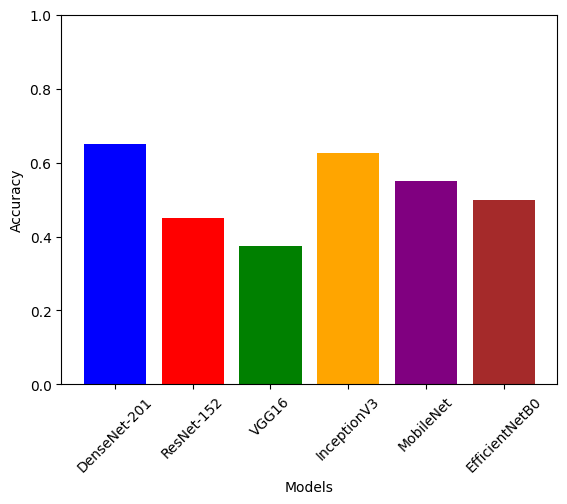

In [39]:
models = ['DenseNet-201', 'ResNet-152', 'VGG16', 'InceptionV3', 'MobileNet', 'EfficientNetB0']
test_accuracy_scores = [densenet_test_score[1],resnet_test_score[1],vgg16_test_score[1],inception_test_score[1],mobilenet_test_score[1],efficientnet_test_score[1]]

# Plot the test accuracy scores
plt.bar(models, test_accuracy_scores, color=['blue', 'red', 'green', 'orange', 'purple', 'brown'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to 0-1 for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [40]:
print(test_accuracy_scores)

[0.6499999761581421, 0.44999998807907104, 0.375, 0.625, 0.550000011920929, 0.5]
